# Importo datos

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1-tgbqle-tpsLrAQzU-86TMN4ffbmaUwy'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('dataset.csv')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset.csv", encoding='ISO-8859-1')
df.drop(columns="NO_QUERY", inplace=True)
first_row = df.columns
df.columns = ["target", "id", "date", "name", "text"]
df = df.append(pd.Series(first_row, index=["target", "id", "date", "name", "text"]), ignore_index=True)
df['target'] = df['target'].replace({0.0: 0, 2: 1, 4: 1})
df['target'] = (df.target == 1)*1
df.shape

<ipython-input-3-f47a3eac1683>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(first_row, index=["target", "id", "date", "name", "text"]), ignore_index=True)


(1600000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  object
 2   date    1600000 non-null  object
 3   name    1600000 non-null  object
 4   text    1600000 non-null  object
dtypes: int64(1), object(4)
memory usage: 61.0+ MB


In [5]:
df.describe()

target
count  1600000.0
mean         0.5
std          0.5
min          0.0
25%          0.0
50%          0.5
75%          1.0
max          1.0

In [6]:
df.head()

target          id                          date           name  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

# Análisis de features

## Análisis básico de strings

In [7]:
df['name_len'] = df['name'].str.len()
df['text_len'] = df['text'].str.len()

In [8]:
df['name_len'].describe()

count    1.600000e+06
mean     1.016227e+01
std      2.716676e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.000000e+01
75%      1.200000e+01
max      1.500000e+01
Name: name_len, dtype: float64

<ipython-input-9-435b6635cceb>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


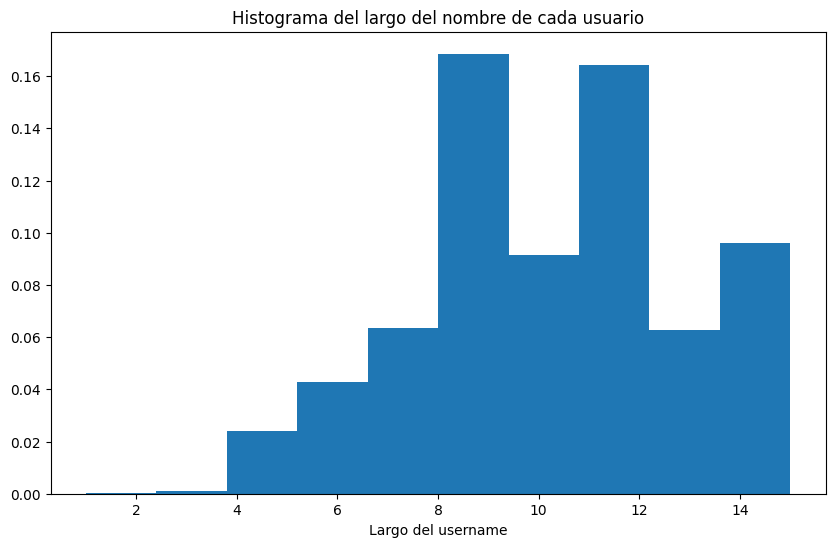

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df['name_len'], density=True)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Histograma del largo del nombre de cada usuario')
ax.set_xlabel('Largo del username')

# Mostrar el gráfico
plt.show()

In [10]:
df['text_len'].describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_len, dtype: float64

<ipython-input-11-7c8c72dd0345>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


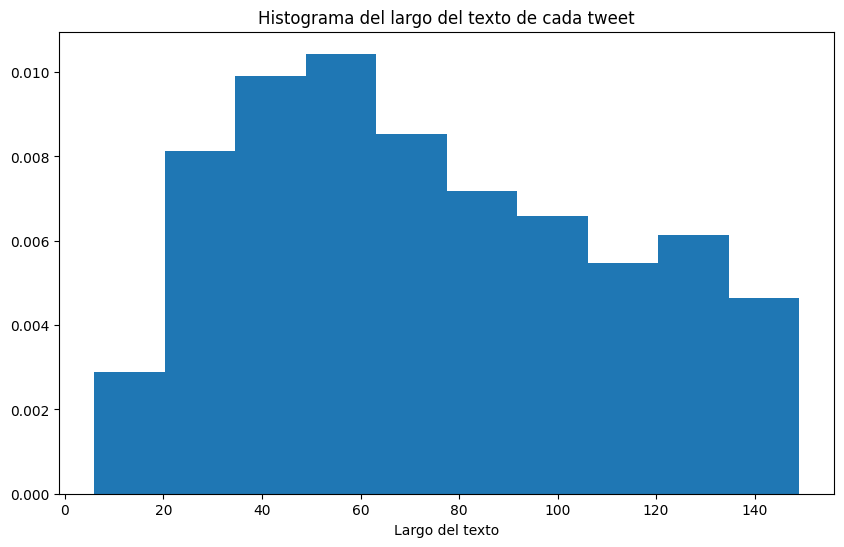

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df[df.text_len < 150]['text_len'], density=True)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Histograma del largo del texto de cada tweet')
ax.set_xlabel('Largo del texto')

# Mostrar el gráfico
plt.show()

## Análisis por fecha y target

In [12]:
import re
df['month'] = df['date'].apply(lambda x: x.split(' ')[1])
df['day'] = df['date'].apply(lambda x: x.split(' ')[0])

In [13]:
dias = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day'] = pd.Categorical(df['day'], categories=dias, ordered=True)

# Contar la cantidad de tweets por día de la semana
tweets_por_dia = df['day'].value_counts().sort_index()

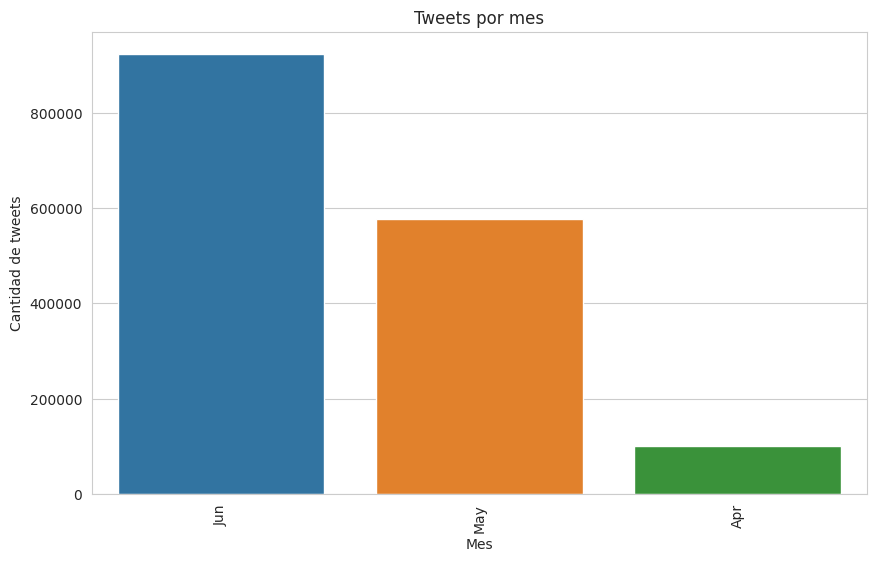

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df['month'].value_counts().index, y=df['month'].value_counts().values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Tweets por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

<ipython-input-15-35aeca281daa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


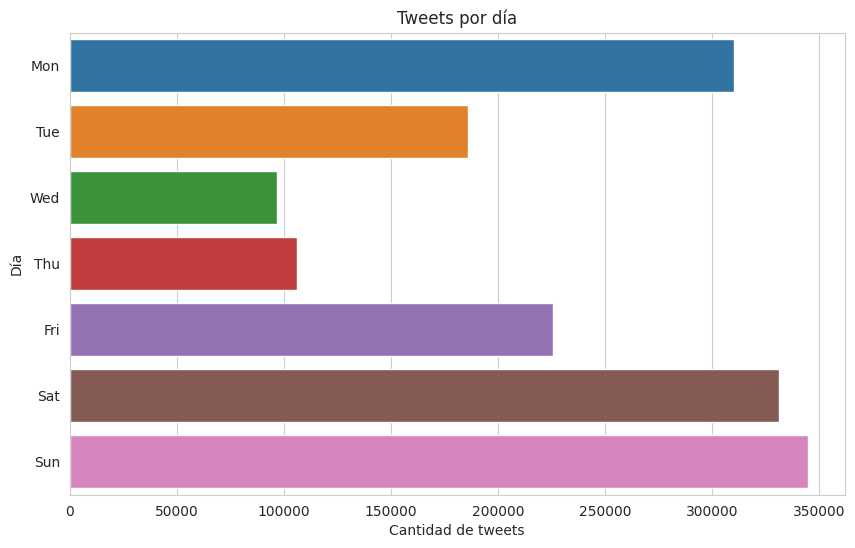

In [15]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=tweets_por_dia.index, x=tweets_por_dia.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Tweets por día')
ax.set_ylabel('Día')
ax.set_xlabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

<ipython-input-16-f101dbeefc96>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


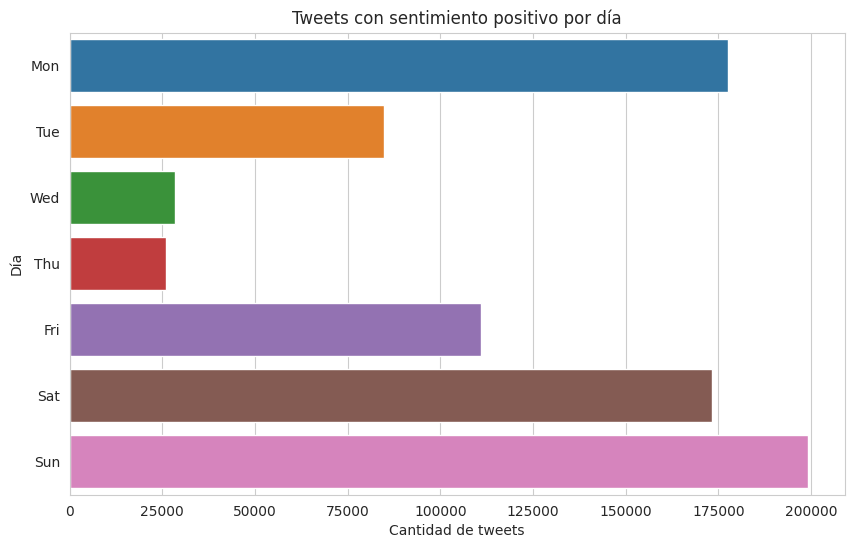

In [16]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
tweets_por_dia = df[df.target==1]['day'].value_counts().sort_index()
sns.barplot(y=tweets_por_dia.index, x=tweets_por_dia.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Tweets con sentimiento positivo por día')
ax.set_ylabel('Día')
ax.set_xlabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

<ipython-input-17-faa92268b975>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


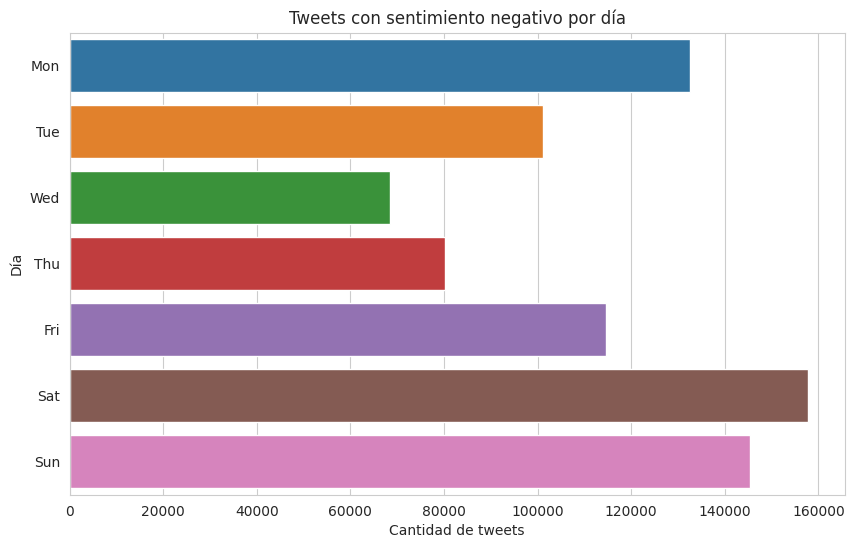

In [17]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
tweets_por_dia = df[df.target==0]['day'].value_counts().sort_index()
sns.barplot(y=tweets_por_dia.index, x=tweets_por_dia.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Tweets con sentimiento negativo por día')
ax.set_ylabel('Día')
ax.set_xlabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

<ipython-input-18-2a1d97aa4318>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


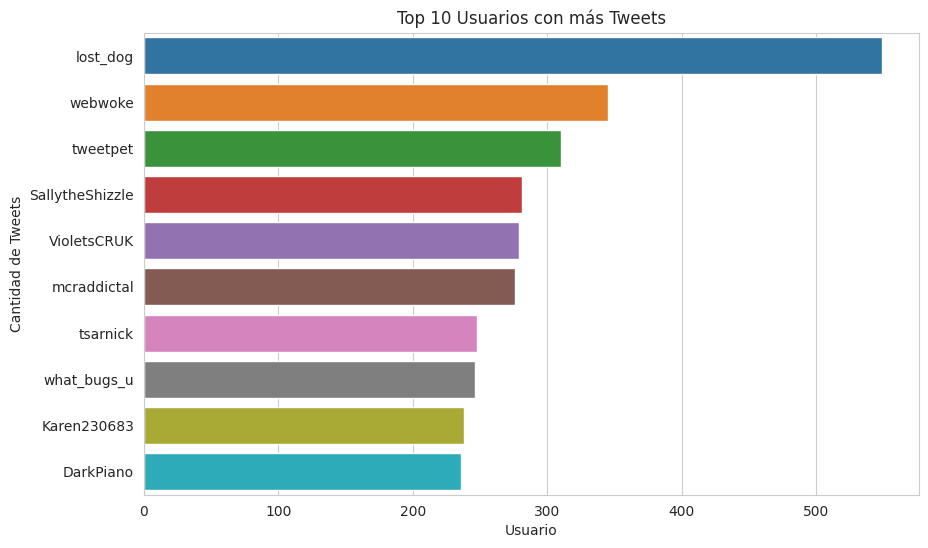

In [18]:
tweets_por_usuario = df.groupby('name')['text'].count()
t = tweets_por_usuario.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=t.index, x=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más Tweets')
ax.set_ylabel('Cantidad de Tweets')
ax.set_xlabel('Usuario')

# Mostrar el gráfico
plt.show()

<ipython-input-19-e163c2261939>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


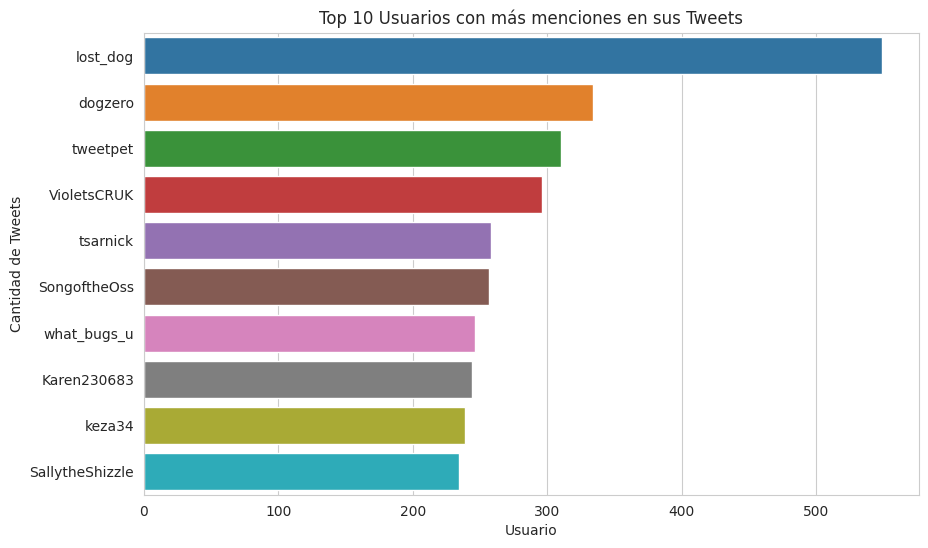

In [19]:
df['cant_menciones'] = df['text'].apply(lambda x: x.count('@'))
menciones = df.groupby('name')['cant_menciones'].sum()
t = menciones.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=t.index, x=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más menciones en sus Tweets')
ax.set_ylabel('Cantidad de Tweets')
ax.set_xlabel('Usuario')

# Mostrar el gráfico
plt.show()

<ipython-input-20-5e038184838c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


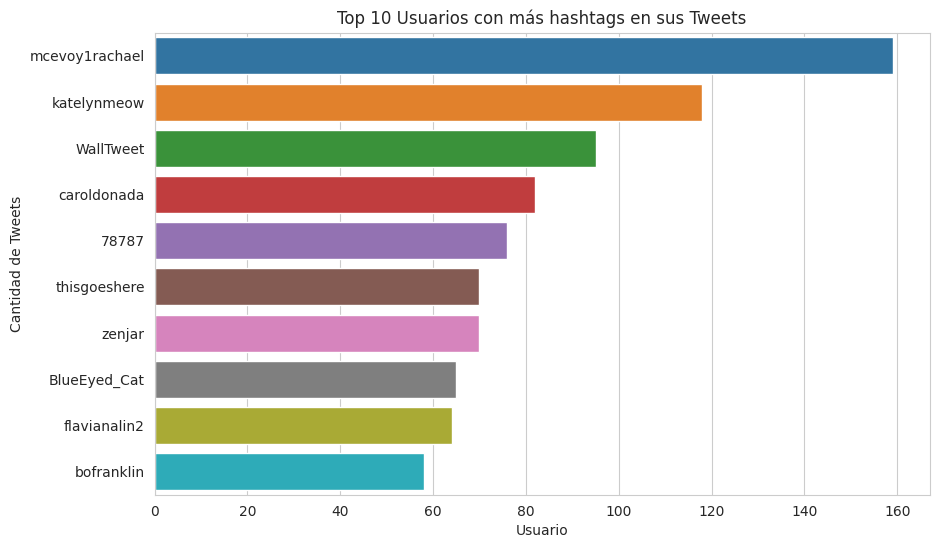

In [20]:
df['cant_hashtags'] = df['text'].apply(lambda x: x.count('#'))
menciones = df.groupby('name')['cant_hashtags'].sum()
t = menciones.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=t.index, x=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más hashtags en sus Tweets')
ax.set_ylabel('Cantidad de Tweets')
ax.set_xlabel('Usuario')

# Mostrar el gráfico
plt.show()

In [21]:
positivo = df[df.target == 1]
negativo = df[df.target == 0]

<ipython-input-22-8e1c74fc8022>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


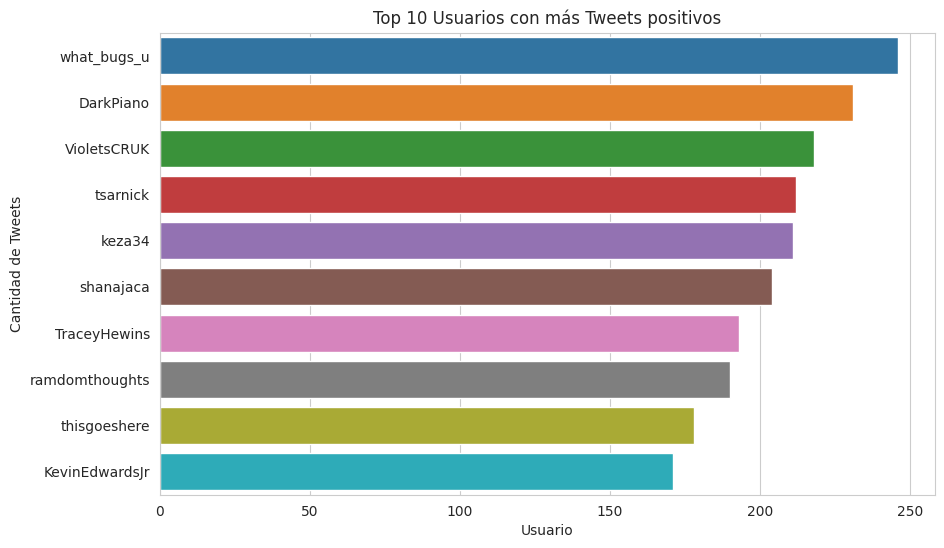

In [22]:
tweets_por_usuario = positivo.groupby('name')['text'].count()
t = tweets_por_usuario.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=t.index, x=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más Tweets positivos')
ax.set_ylabel('Cantidad de Tweets')
ax.set_xlabel('Usuario')

# Mostrar el gráfico
plt.show()

<ipython-input-23-37268cec2904>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


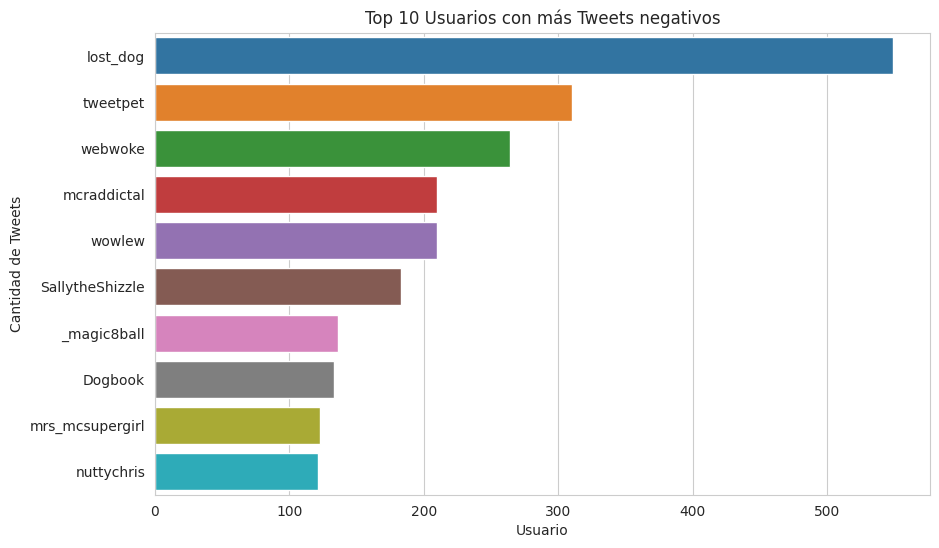

In [23]:
tweets_por_usuario = negativo.groupby('name')['text'].count()
t = tweets_por_usuario.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=t.index, x=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels())

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más Tweets negativos')
ax.set_ylabel('Cantidad de Tweets')
ax.set_xlabel('Usuario')

# Mostrar el gráfico
plt.show()

## Análisis de palabras

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from collections import defaultdict

corpus=[]
text=df['text'].str.split()
text=text.values.tolist()
corpus=[word for i in text for word in i]

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [26]:
dic_df = pd.DataFrame.from_dict(dic, orient='index', columns=['count'])
dic_df.reset_index(inplace=True)
dic_df.rename(columns={'index':'word'}, inplace=True)
aux = dic_df.nlargest(10, 'count')

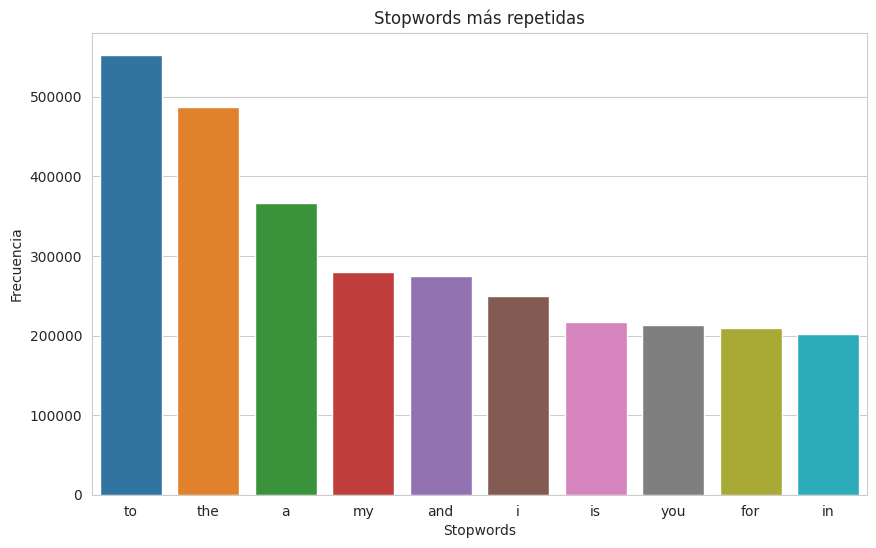

In [27]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=aux)

ax.set_title('Stopwords más repetidas')
ax.set_xlabel('Stopwords')
ax.set_ylabel('Frecuencia')
plt.show()

In [28]:
from collections import Counter
counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

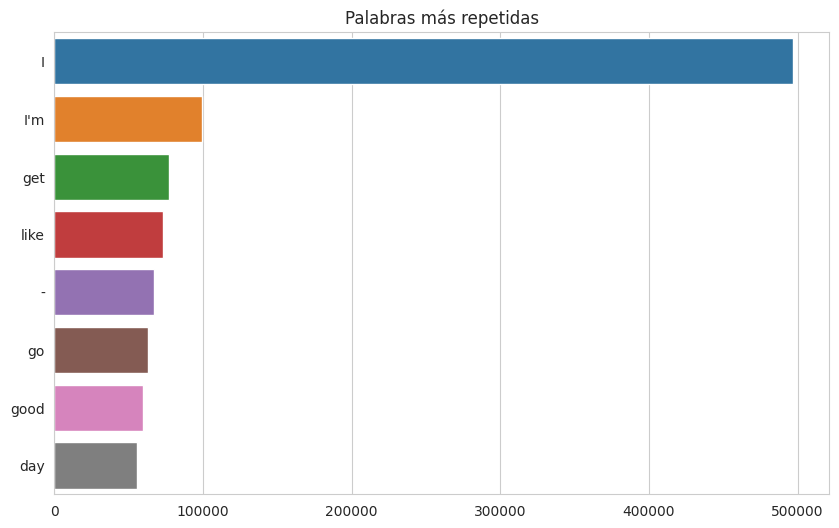

In [29]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=y, y=x)

ax.set_title('Palabras más repetidas')
plt.show()

In [30]:
import re
connector_patterns = r'[_.-]'
names = df['name'].apply(lambda x: re.split(connector_patterns, x.lower()))
flat_list = [item for sublist in names for item in sublist if len(item) > 3]
counter = Counter(flat_list)
most_common = counter.most_common(10)
aux = pd.DataFrame(most_common, columns=['element', 'count'])

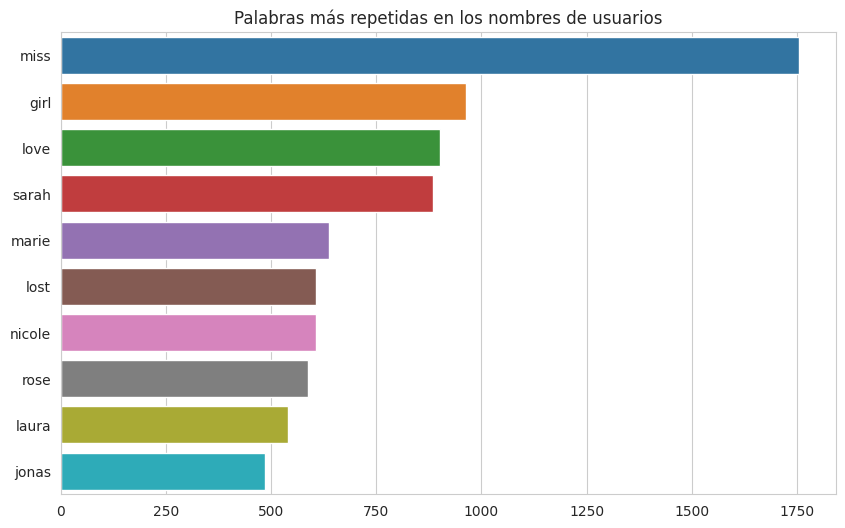

In [31]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='element', x='count', data=aux)

ax.set_title('Palabras más repetidas en los nombres de usuarios')
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

In [32]:
# positivos
names = positivo['name'].apply(lambda x: re.split(connector_patterns, x.lower()))
flat_list = [item for sublist in names for item in sublist if len(item) > 3]
counter = Counter(flat_list)
most_common = counter.most_common(10)
p_aux = pd.DataFrame(most_common, columns=['element', 'count'])

# negativos
names = negativo['name'].apply(lambda x: re.split(connector_patterns, x.lower()))
flat_list = [item for sublist in names for item in sublist if len(item) > 3]
counter = Counter(flat_list)
most_common = counter.most_common(10)
n_aux = pd.DataFrame(most_common, columns=['element', 'count'])

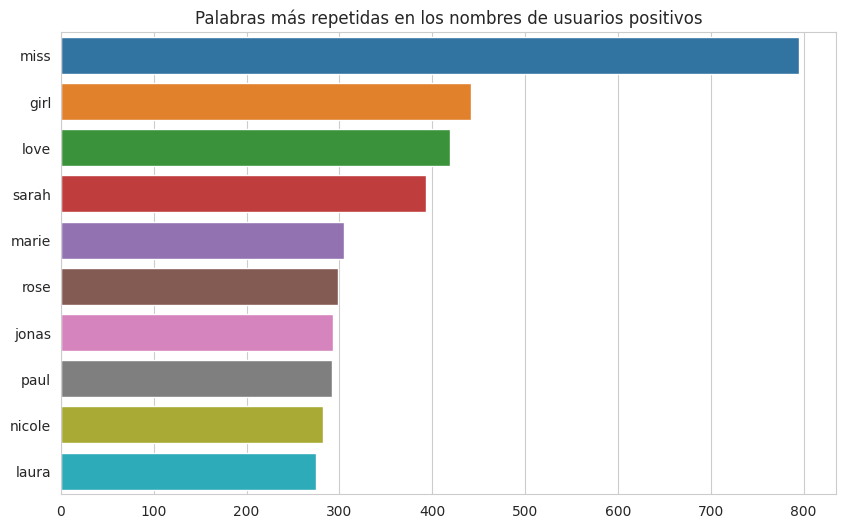

In [33]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='element', x='count', data=p_aux)

ax.set_title('Palabras más repetidas en los nombres de usuarios positivos')
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

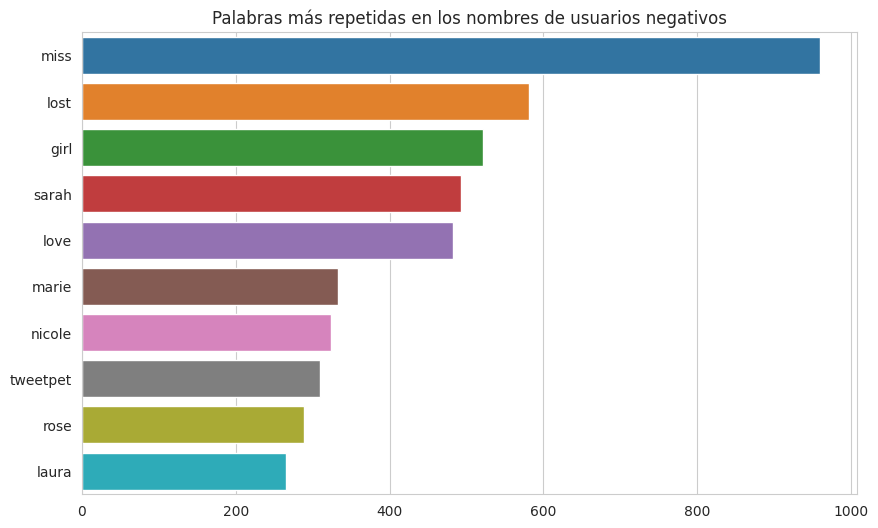

In [34]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='element', x='count', data=n_aux)

ax.set_title('Palabras más repetidas en los nombres de usuarios negativos')
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

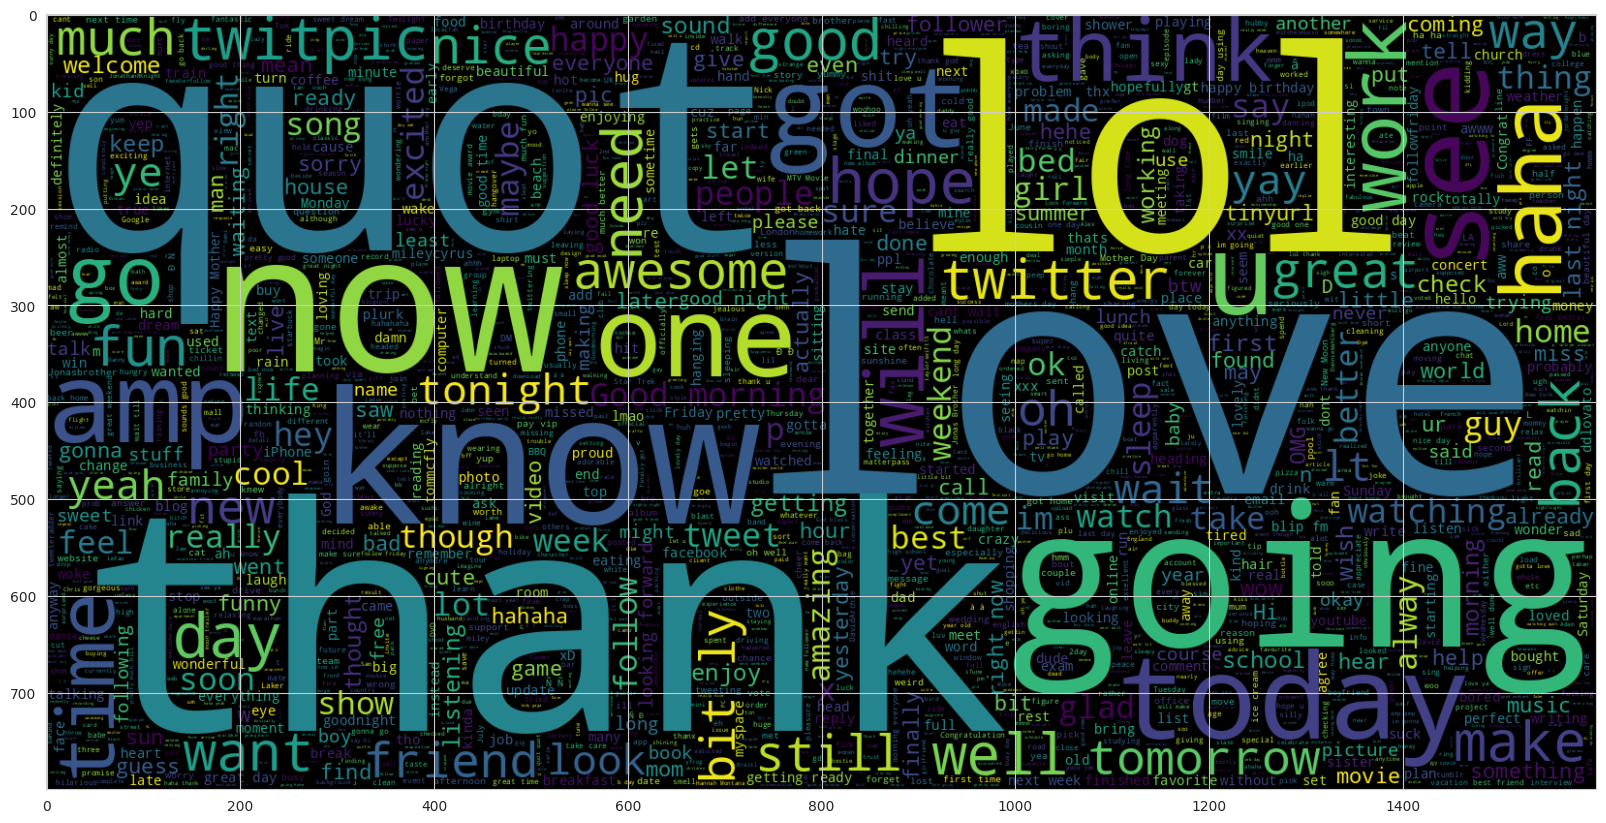

In [36]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

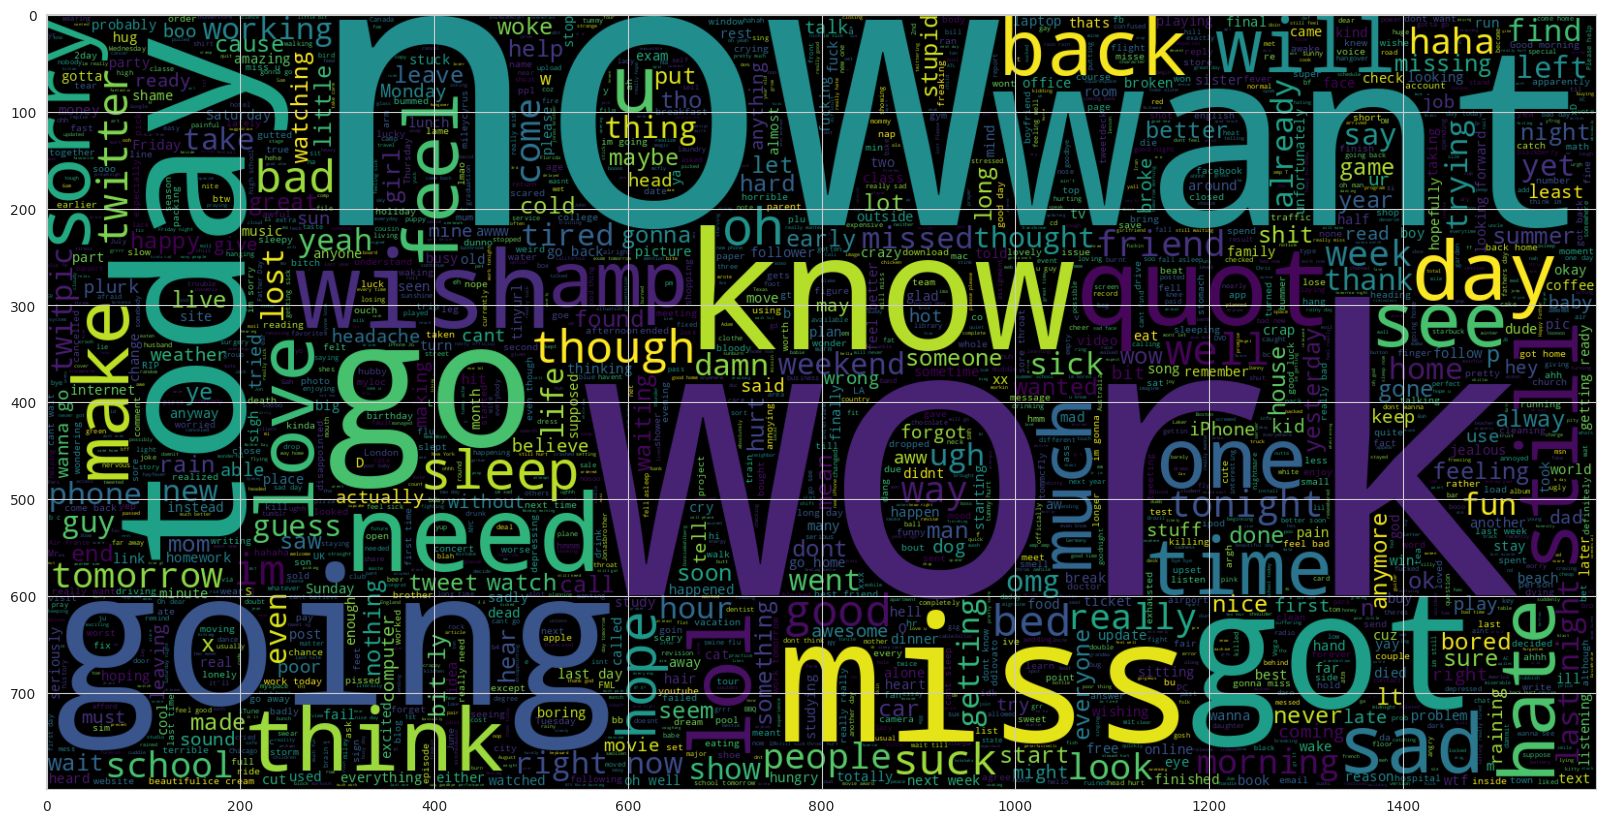

In [37]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

## Análisis por fecha y tópico

En la fecha con más tweets positivos: de qué carajos se habló?

In [38]:
df['date'] = df['date'].apply(lambda a: a.split()[2].zfill(2)+a.split()[1][:3])

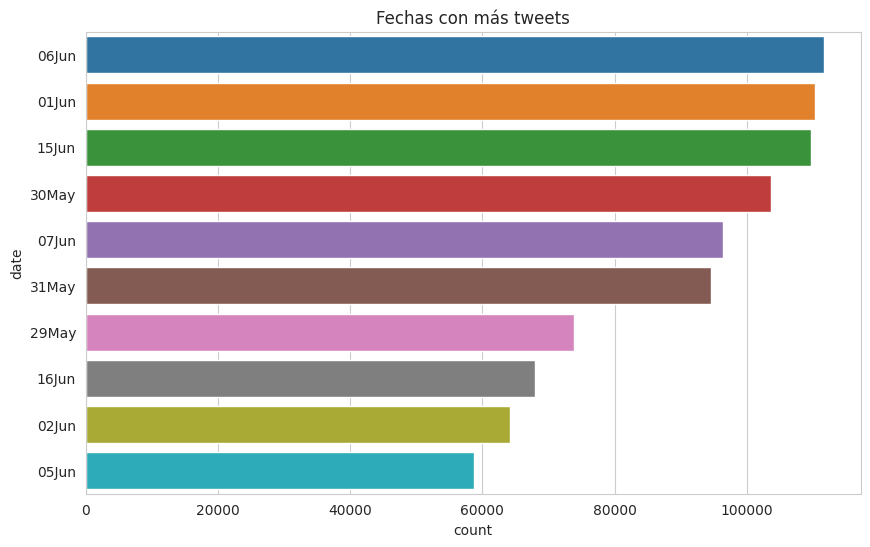

In [39]:
aux = pd.DataFrame(df.date.value_counts())
aux.reset_index(inplace=True)
aux.columns = ["date", "count"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='count', y='date', data=aux.sort_values(ascending=False, by='count').head(10))

ax.set_title('Fechas con más tweets')
plt.show()

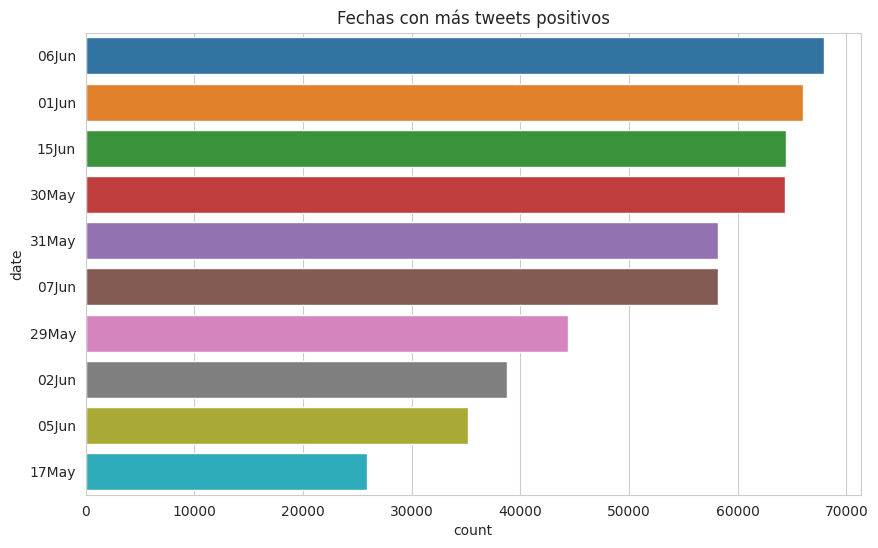

In [40]:
aux = pd.DataFrame(df[df.target == 1].date.value_counts())
aux.reset_index(inplace=True)
aux.columns = ["date", "count"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='count', y='date', data=aux.sort_values(ascending=False, by='count').head(10))

ax.set_title('Fechas con más tweets positivos')
plt.show()

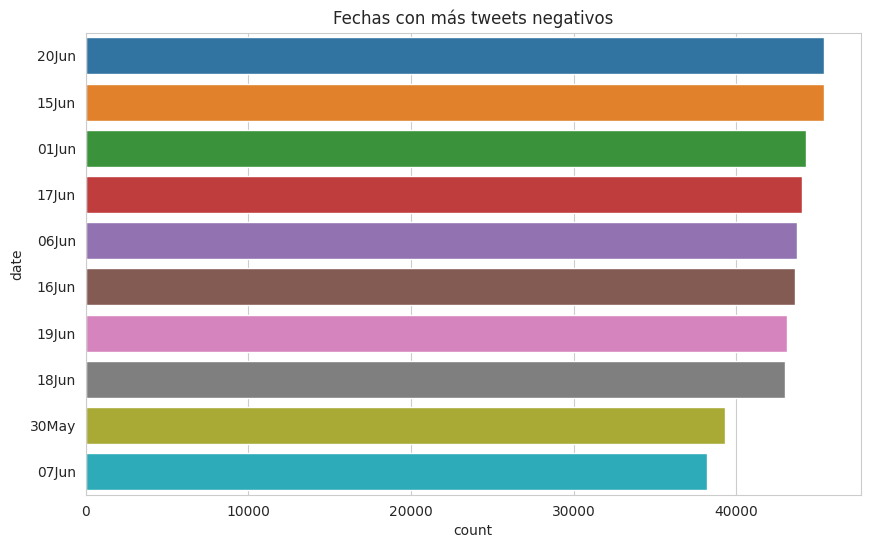

In [41]:
aux = pd.DataFrame(df[df.target == 0].date.value_counts())
aux.reset_index(inplace=True)
aux.columns = ["date", "count"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='count', y='date', data=aux.sort_values(ascending=False, by='count').head(10))

ax.set_title('Fechas con más tweets negativos')
plt.show()

In [42]:
dia_negativo = df[(df.target == 0) & (df.date == '20Jun')]
dia_positivo = df[(df.target == 1) & (df.date == '06Jun')]

In [43]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [44]:
top_pos = get_top_ngram(dia_positivo['text'], 2)[:10]
top_neg = get_top_ngram(dia_negativo['text'], 2)[:10]

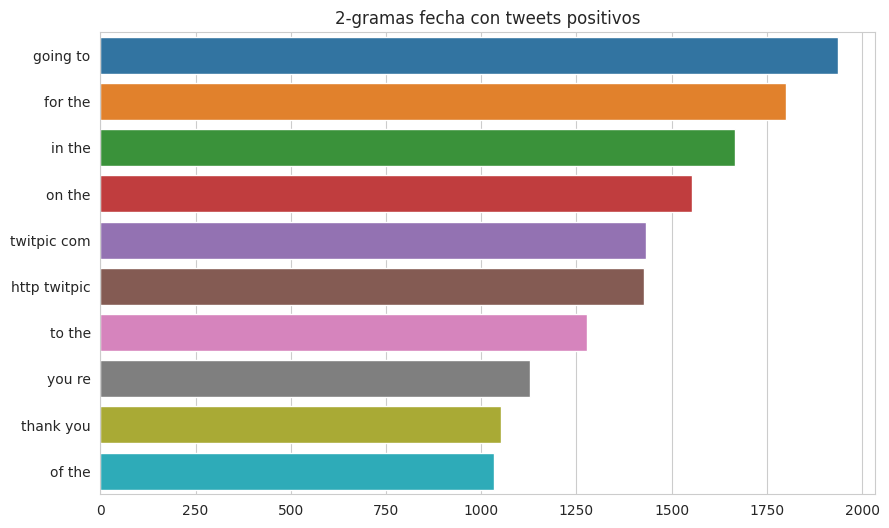

In [45]:
x,y=map(list,zip(*top_pos))
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=y, y=x)

ax.set_title('2-gramas fecha con tweets positivos')
plt.show()

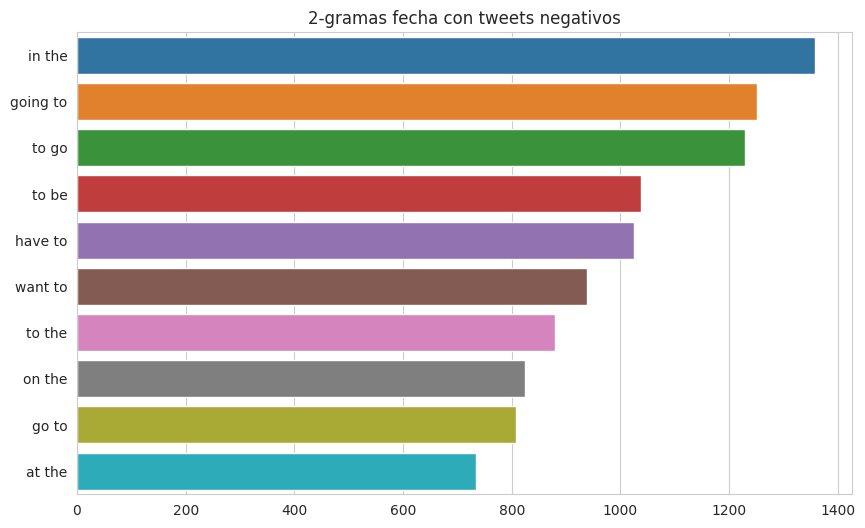

In [46]:
x,y=map(list,zip(*top_neg))
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=y, y=x)

ax.set_title('2-gramas fecha con tweets negativos')
plt.show()

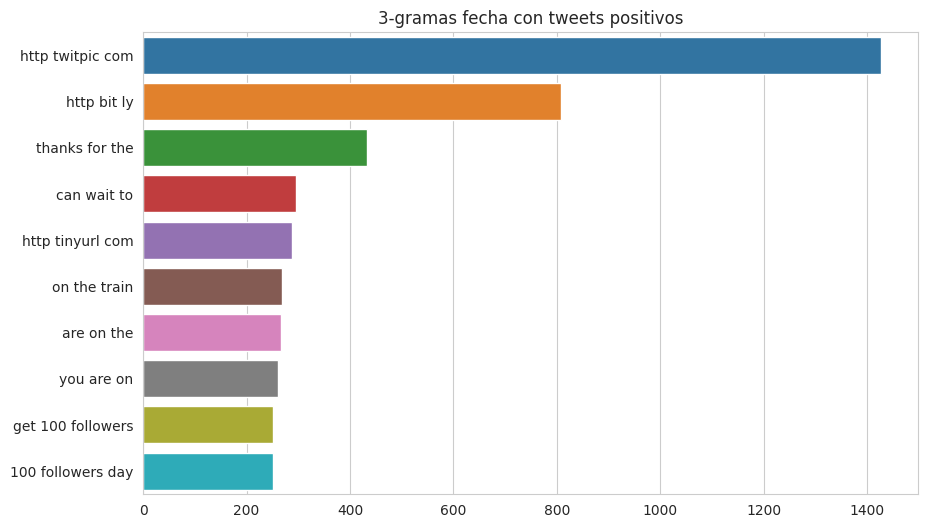

In [47]:
top_pos = get_top_ngram(dia_positivo['text'], 3)[:10]
x,y=map(list,zip(*top_pos))
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=y, y=x)

ax.set_title('3-gramas fecha con tweets positivos')
plt.show()

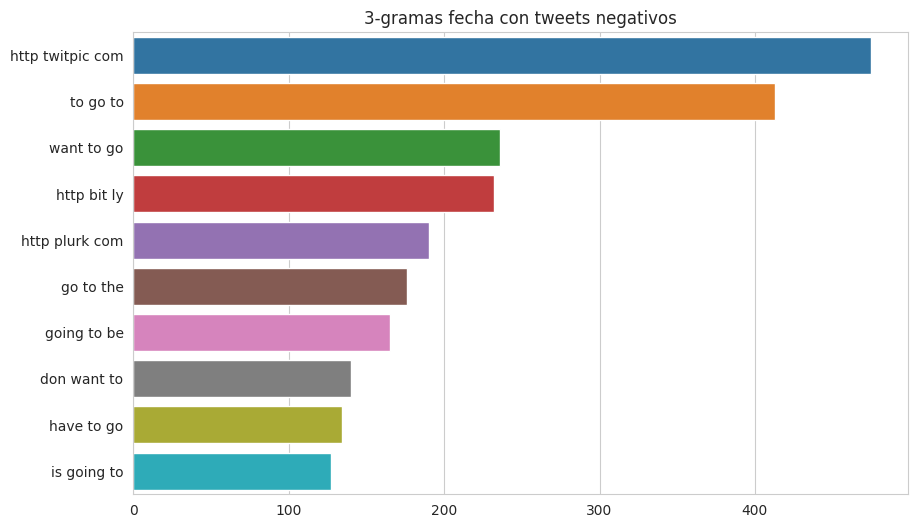

In [48]:
top_neg = get_top_ngram(dia_negativo['text'], 3)[:10]
x,y=map(list,zip(*top_neg))
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=y, y=x)

ax.set_title('3-gramas fecha con tweets negativos')
plt.show()